In [3]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from utils  import merge_multiple_tables_custom
import os

pd.set_option('display.max_rows', 200)

### Analyzing means of day 

For the analyzis I am going to calculate the mean for every day and plot them, changing the following input parameters:
- route
- age
- discount
- tariffClass

In [4]:
def get_means(route, age, discount, tariffClass, start, number_of_days, end):
    path=f'data/{route}/data_{age}_{discount}_{tariffClass}'
    df = merge_multiple_tables_custom(path, start, number_of_days, end)
    
    #df.drop(df[df['ticket type'] == 'Super Sparpreis Young'].index, inplace = True)
    #df.drop(df[df['ticket type'] == 'Sparpreis'].index, inplace = True)
    df.drop(df[df['ticket type'] == 'Super Sparpreis 1.Kl'].index, inplace = True)
    df.drop(df[df['ticket type'] == 'Quer-Durchs-Land-Ticket'].index, inplace = True)
    #df.drop(df[df['ticket type'] == 'Flexpreis Plus'].index, inplace = True)
    #df.drop(df[df['ticket type'] == 'Flexpreis Plus 1.Kl'].index, inplace = True)
    #df.drop(df[df['ticket type'] == 'Flexpreis 1.Kl'].index, inplace = True)
    
    
    df['date'] = pd.to_datetime(df['datetime dep']).dt.date
    
    
    mean_per_day = df.groupby(['date', 'ticket type']).mean()
    
    mean_per_day = mean_per_day.rename(columns={'price': 'mean price'})

   
    
    return mean_per_day
    

In [5]:
def plot(df):
    # palette = {'Monday': 'C1', 'Tuesday': 'C2', 'Wednesday': 'C3', 'Thursday': 'C4', 'Friday': 'C5', 'Saturday': 'C6', 'Sunday': 'C7', }
    plt = sb.lineplot(data=df, x='date', y='mean price', hue='ticket type') #, palette = palette )
    plt.set_xticklabels(plt.get_xticklabels(),rotation = 40)
    plt.tick_params(labelsize=8)
    sb.move_legend(plt, "upper left", bbox_to_anchor=(1, 1))
    title = 'Mean prices for each day grouped by ticket type'
    plt.set(title = title)
    fig = plt.get_figure()
    fig.savefig('test.png', dpi=200, bbox_inches='tight')

/tmp/ipykernel_38984/4221015823.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_per_day = df.groupby(['date', 'ticket type']).mean()
/tmp/ipykernel_38984/674459965.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.set_xticklabels(plt.get_xticklabels(),rotation = 40)


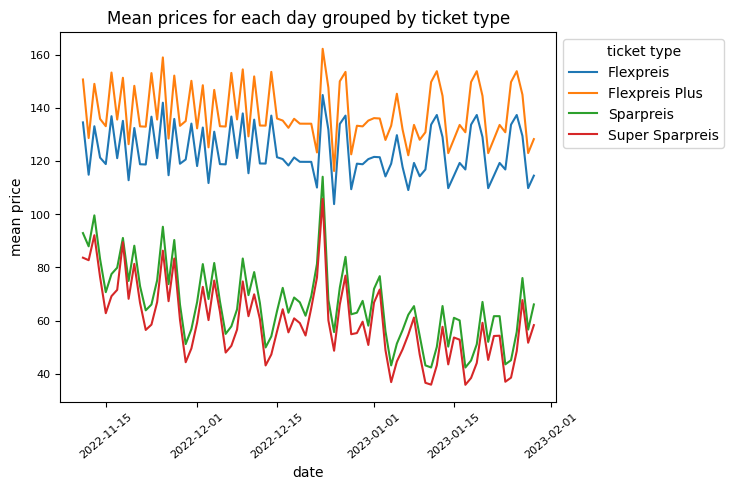

In [6]:
df = get_means('berlin-biberach', 'E', '3', '1', '11.11.2022', 80, None)
plot(df)
#df

/tmp/ipykernel_32496/4221015823.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_per_day = df.groupby(['date', 'ticket type']).mean()
/tmp/ipykernel_32496/739386073.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.set_xticklabels(plt.get_xticklabels(),rotation = 40)


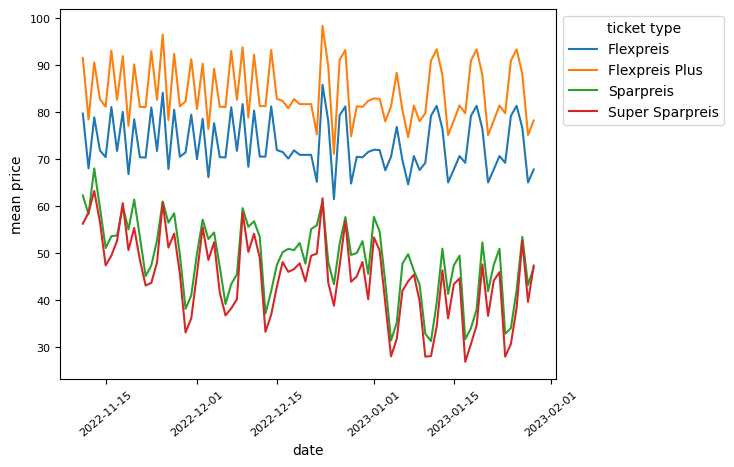

In [5]:
df = get_means('berlin-biberach', 'E', '4', '2', '11.11.2022', 80, None)
plot(df)

/tmp/ipykernel_32496/4221015823.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_per_day = df.groupby(['date', 'ticket type']).mean()
/tmp/ipykernel_32496/739386073.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.set_xticklabels(plt.get_xticklabels(),rotation = 40)


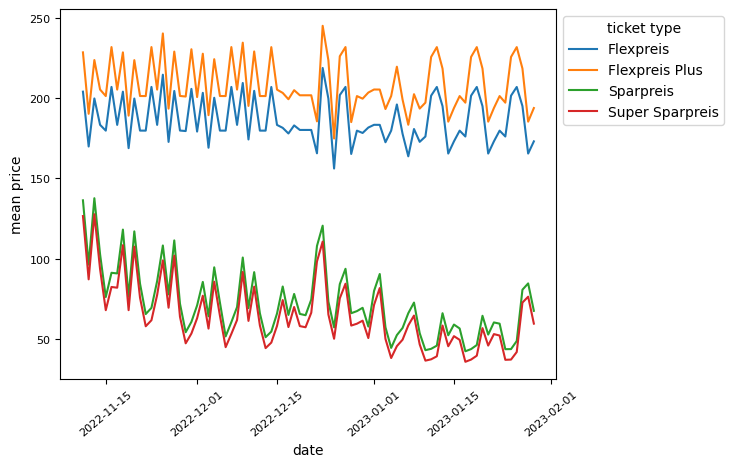

In [8]:
df = get_means('berlin-memmingen', 'Y', '1', '1', '11.11.2022', 80, None)
plot(df)